In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
data = pd.read_csv('./data/kickstarter.csv')

In [6]:
main_categories = data["main_category"].values
main_categories = np.unique(main_categories)
main_categories = pd.Series(data=main_categories)

In [7]:
def count_items_in_category(df, category, state_param):
    temp = df[df.main_category == category]
    temp = temp[temp.state == state_param]
    series = temp['state'].value_counts()
    return series.at[state_param]

In [8]:
main_categories_df = pd.DataFrame(columns=['successes', 'fails', 'cancellations'])
main_categories_df.insert(loc=0, column='main_category', value=main_categories)

for main_category in main_categories:
    main_categories_df.loc[main_categories_df['main_category'] == main_category, 'successes'] = count_items_in_category(data, main_category, 'successful')
    main_categories_df.loc[main_categories_df['main_category'] == main_category, 'fails'] = count_items_in_category(data, main_category, 'failed')
    main_categories_df.loc[main_categories_df['main_category'] == main_category, 'cancellations'] = count_items_in_category(data, main_category, 'canceled')

main_categories_df['total_projects'] = main_categories_df.apply(lambda row: row.successes + row.fails + row.cancellations, axis=1)

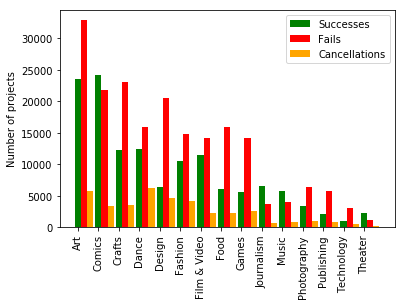

In [9]:
# Sort by total projects
main_categories_df = main_categories_df.sort_values('total_projects', ascending=False)

x = np.arange(main_categories.size)
fig, ax1 = plt.subplots()

width = 0.3
plt.xticks(x, main_categories, rotation='vertical')

successes = ax1.bar(x, main_categories_df.successes, width, color="green")
fails = ax1.bar(x + width, main_categories_df.fails, width, color="red")
cancellations = ax1.bar(x + width * 2, main_categories_df.cancellations, width, color="orange")

plt.ylabel("Number of projects")
plt.legend([successes, fails, cancellations], ["Successes", "Fails", "Cancellations"])
figure = plt.gcf()
plt.show()